# Prediction of Turnover of  National Stocks

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('C:/Users/RDX/Desktop/Varun/Machine Learning/Kaggle Projects/nifty_it_index.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Turnover
0,2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
1,2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2,2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
3,2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
4,2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


In [4]:
df.shape

(248, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      248 non-null    object 
 1   Open      248 non-null    float64
 2   High      248 non-null    float64
 3   Low       248 non-null    float64
 4   Close     248 non-null    float64
 5   Volume    248 non-null    int64  
 6   Turnover  248 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [52]:
df['Date']=pd.to_datetime(df['Date'])

In [53]:
df=df.set_index('Date')

In [8]:
df.head()

,Open,High,Low,Close,Volume,Turnover
Date,,,,,,
2015-01-01,11214.80,11235.75,11166.35,11215.70,4246150,3.575100e+09
2015-01-02,11214.65,11399.10,11214.65,11372.10,10004862,9.645600e+09
2015-01-05,11369.35,11433.75,11186.95,11248.55,8858018,1.059000e+10
2015-01-06,11186.10,11186.10,10909.00,10959.90,12515739,1.364500e+10
2015-01-07,11013.20,11042.35,10889.55,10916.00,10976356,1.203440e+10


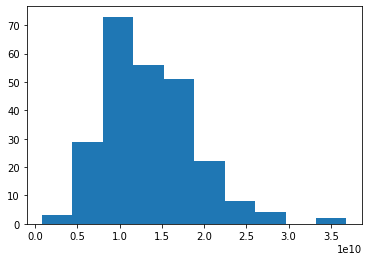

In [9]:
plt.hist(df.Turnover)
plt.show()

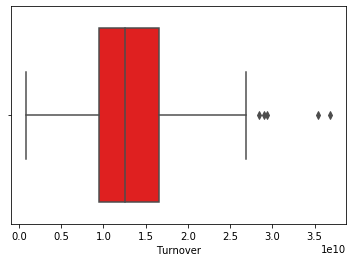

In [10]:
sns.boxplot(df.Turnover,color='red')
plt.show()

In [11]:
iqr=df['Turnover'].quantile(0.75) - df['Turnover'].quantile(0.25)
iqr

7134950000.0

In [12]:
LL=df['Turnover'].quantile(0.25) - (1.5*iqr)
print('LowerEnd=',LL)
Ul=df['Turnover'].quantile(0.75) + (1.5*iqr)
print('UpperEnd=',Ul)

LowerEnd= -1263925000.0
UpperEnd= 27275875000.0


In [13]:
#res=[x for x in df['Turnover'] if ((x > LL) & (x < Ul))]
#len(res)
#res=pd.DataFrame(res,columns=['Turnover'])
#res

In [14]:
df1=df[['Turnover']]
df1

,Turnover
Date,
2015-01-01,3.575100e+09
2015-01-02,9.645600e+09
2015-01-05,1.059000e+10
2015-01-06,1.364500e+10
2015-01-07,1.203440e+10
...,...
2015-12-24,3.182700e+09
2015-12-28,1.001900e+10
2015-12-29,6.626200e+09


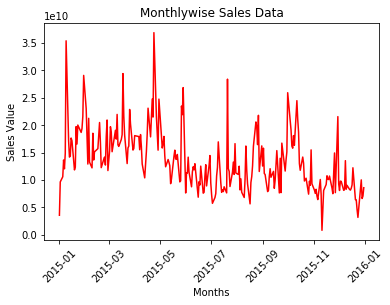

In [15]:
#Plot
plt.plot(df1, 'r')
plt.xticks(rotation=45)
plt.title('Monthlywise Sales Data')
plt.xlabel('Months')
plt.ylabel('Sales Value')
plt.show()

In [16]:
#Decompose with multiplicative model
from statsmodels.tsa.seasonal import seasonal_decompose
turn_dec_m = seasonal_decompose(df1,period=1, model='mul')

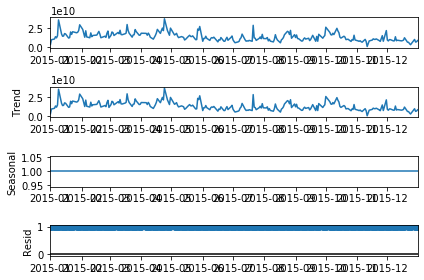

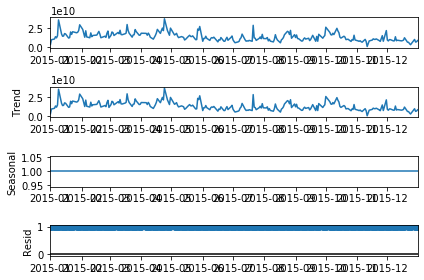

In [17]:
turn_dec_m.plot()

In [18]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
turn_adf = adfuller(df1)

print('ADF Statistic: %f' % turn_adf[0])
print('p-value: %f' % turn_adf[1])
print('Critical Values:')
for key, value in turn_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.412996
p-value: 0.010524
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573


In [19]:
#Moving Average
turn_ma3=df1.rolling(window=3).mean()
turn_ma3.head(10)

,Turnover
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-05,7.936900e+09
2015-01-06,1.129353e+10
2015-01-07,1.208980e+10
2015-01-08,1.351190e+10
2015-01-09,2.075163e+10
2015-01-12,2.244787e+10
2015-01-13,2.222080e+10


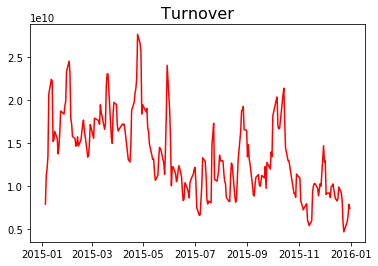

In [20]:
#Lineplot
plt.plot(turn_ma3,'r')
plt.title('Turnover',fontsize=16)
plt.show()

In [21]:
#Residuals
turn_ma3_res=df1 - turn_ma3
turn_ma3_res.head()

,Turnover
Date,
2015-01-01,NaN
2015-01-02,NaN
2015-01-05,2.653100e+09
2015-01-06,2.351467e+09
2015-01-07,-5.540000e+07


In [22]:
turn_ma3_res=turn_ma3_res.dropna()
turn_ma3_res.head()

,Turnover
Date,
2015-01-05,2.653100e+09
2015-01-06,2.351467e+09
2015-01-07,-5.540000e+07
2015-01-08,1.344400e+09
2015-01-09,1.461257e+10


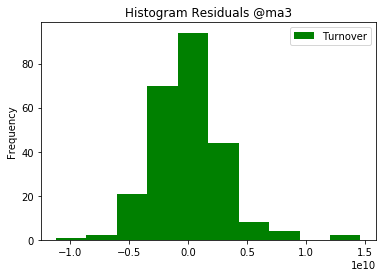

In [23]:
#Plotting Histogram for residuals
turn_ma3_res.plot(kind='hist',facecolor='g')
plt.title('Histogram Residuals @ma3')
plt.show()

In [24]:
#Squaring residuals
turn_ma3_se=pow(turn_ma3_res,2)
turn_ma3_se.head()

,Turnover
Date,
2015-01-05,7.038940e+18
2015-01-06,5.529395e+18
2015-01-07,3.069160e+15
2015-01-08,1.807411e+18
2015-01-09,2.135271e+20


In [25]:
#Mean of squared residuals
turn_ma3_mse=(turn_ma3_se.sum())/len(turn_ma3_se)
print(turn_ma3_mse)

Turnover    9.649912e+18
dtype: float64


In [26]:
#Root of average
from math import sqrt
turn_ma3_rmse=sqrt(turn_ma3_mse)
print(turn_ma3_rmse)

3106430784.9972


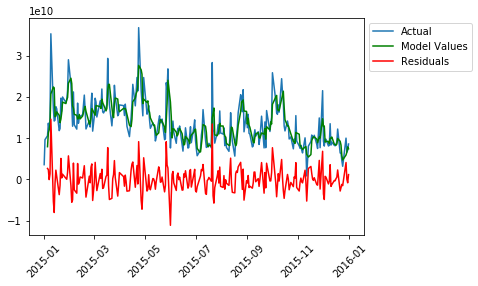

In [27]:
#Plot comparision Actual, Model Values & Residuals
plt.plot(df1)
plt.plot(turn_ma3, 'g')
plt.plot(turn_ma3_res, 'r')
plt.legend(['Actual','Model Values', 'Residuals'],
           bbox_to_anchor=(1, 1), loc=2)
plt.xticks(rotation=45)
plt.show()

In [28]:
#Applying auto arima method for prediction
from pmdarima import auto_arima

In [30]:
turn_aa = auto_arima(df1)
turn_aa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  248
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -5832.592
Date:                Mon, 20 Sep 2021   AIC                          11673.185
Time:                        18:22:13   BIC                          11687.222
Sample:                             0   HQIC                         11678.836
                                - 248                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3465      0.069      4.987      0.000       0.210       0.483
ar.L2          0.1310      0.079      1.657      0.097      -0.024       0.286
ma.L1         -0.9299      0.035    -26.311      0.000      -0.999      -0.861
sigma2      1.945e+19   2.48e-21   7.83e+39      0.000    1.95e+19    1.95e+19
===================================================================================
Ljung-Box (Q):                       38.48   Jarque-Bera (JB):               346.63
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               0.51   Skew:                             1.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.32e+55. Standard errors may be unstable.
"""

In [31]:
df1.tail()

,Turnover
Date,
2015-12-24,3.182700e+09
2015-12-28,1.001900e+10
2015-12-29,6.626200e+09
2015-12-30,7.071900e+09
2015-12-31,8.590500e+09


In [33]:
#Model with triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
turn_es = ExponentialSmoothing(df1, seasonal_periods=12,
                                 trend='add', seasonal='add').fit()
turn_es.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Dep. Variable:,endog,No. Observations:,248
Model:,ExponentialSmoothing,SSE,6362333296222711840768.000
Optimized:,True,AIC,11115.431
Trend:,Additive,BIC,11171.646
Seasonal:,Additive,AICC,11118.418
Seasonal Periods:,12,Date:,"Mon, 20 Sep 2021"
Box-Cox:,False,Time:,18:25:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2347972,alpha,True
smoothing_slope,0.0122468,beta,True


In [34]:
#Residuals
turn_res1 = pd.DataFrame(turn_es.resid)
turn_res1.head()

,0
Date,
2015-01-01,-2.962604e+08
2015-01-02,-5.221078e+08
2015-01-05,-6.934255e+08
2015-01-06,-8.225244e+08
2015-01-07,-9.189460e+08


Text(0.5, 1.0, 'Line plot of Residuals')

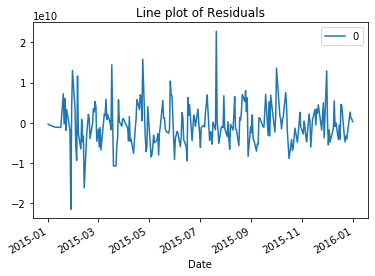

In [35]:
#Lineplot
turn_res1.plot()
plt.title('Line plot of Residuals')

Text(0.5, 1.0, 'Histogram of Residuals')

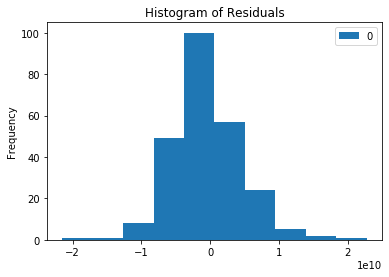

In [36]:
#Histogram of residuals
turn_res1.plot(kind='hist')
plt.title('Histogram of Residuals')

Text(0.5, 1.0, 'Density plot of Residuals')

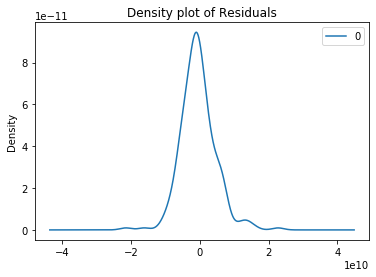

In [37]:
#Density plot
turn_res1.plot(kind='kde')
plt.title('Density plot of Residuals')

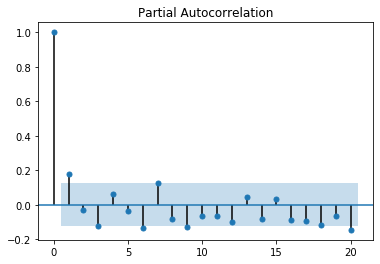

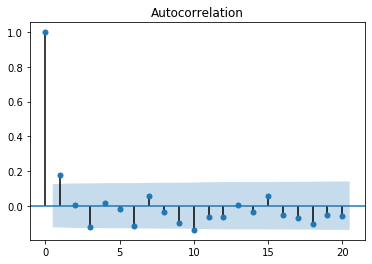

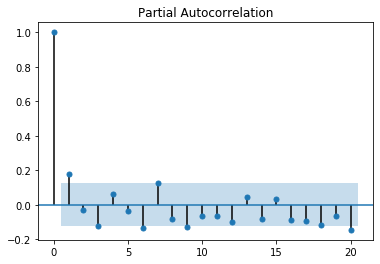

In [38]:
#Plotting acf & pacf for residuals
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(turn_res1, lags=20) 
plot_pacf(turn_res1, lags=20)

In [39]:
#Squaring residuals/ errors
turn_se1 = pow(turn_res1,2)
turn_se1.head()

,0
Date,
2015-01-01,8.777023e+16
2015-01-02,2.725966e+17
2015-01-05,4.808390e+17
2015-01-06,6.765464e+17
2015-01-07,8.444617e+17


In [40]:
#average/mean of squared residuals/ errors
turn_mse1 = (turn_se1.sum())/len(turn_se1)
print(turn_mse1)

0    2.565457e+19
dtype: float64


In [41]:
#Root of average/mean of squared residuals/ errors
turn_rmse1 = sqrt(turn_mse1) 
turn_rmse1

5065034031.754724

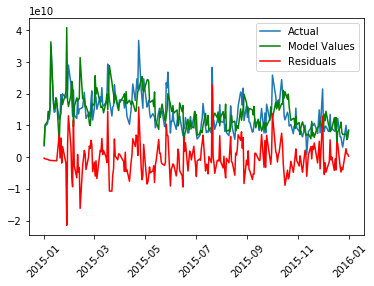

In [42]:
#Plot Actual, Model Values and Residuals
plt.plot(df1)
plt.plot(turn_es.fittedvalues, 'g')
plt.plot(turn_res1, 'r')
plt.legend(['Actual','Model Values', 'Residuals'])
plt.xticks(rotation=45)
plt.show()

In [43]:
#Predict/forecast
turn_fore = turn_es.forecast(12) 
turn_fore

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


248    6.832058e+09
249    9.543872e+09
250    5.506477e+09
251    7.737213e+09
252    5.670170e+09
253    7.368878e+09
254    5.705119e+09
255    5.560130e+09
256    9.044757e+09
257    6.069043e+09
258    6.330462e+09
259    7.926754e+09
dtype: float64

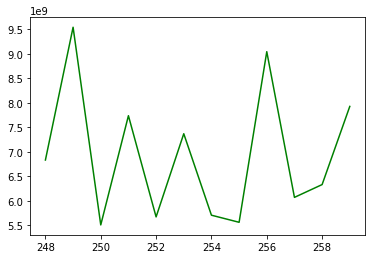

In [57]:
plt.plot(turn_fore,'g')
plt.show()